In [1]:
import numpy as np              # Numpy is the fundamental package for scientific computing in Python.
import netCDF4 as nc            # NetCDF is the data format of the meteorological data that we use.
import matplotlib.pyplot as pl  # Matplotlib is a scientific plotting package.
from mpl_toolkits.basemap import Basemap # Import the map plotting interface.

# The statement below enforces the plots to be put into this notebook, instead of in their own windows.
%pylab inline
pl.rcParams.update({'font.size': 12})          # Set the standard font size of the plots to 11pt.
pl.rcParams.update({'figure.figsize': [13,6]}) # Set the standard figure size.

Populating the interactive namespace from numpy and matplotlib


In [2]:
m = Basemap(llcrnrlon=-150, llcrnrlat=20,
            urcrnrlon=  50, urcrnrlat=70,
            projection='mill', resolution='l')

In [3]:
nc_file = nc.Dataset("data/era_data.nc", "r")
lat = nc_file.variables["latitude"][:]
lon = nc_file.variables["longitude"][:]
p = nc_file.variables["level"][:]*100
t = -1
p_plot = 50000.
n = abs(p-p_plot).argmin()
nroll = lon.size//2
lon = np.roll(lon, nroll)
lon = np.where(lon>=180., lon-360., lon)

u = np.roll(nc_file.variables["u"][t,:,:,:], nroll, -1)
v = np.roll(nc_file.variables["v"][t,:,:,:], nroll, -1)
z = np.roll(nc_file.variables["z"][t,:,:,:], nroll, -1)
T = np.roll(nc_file.variables["t"][t,:,:,:], nroll, -1)

lons, lats = m(*np.meshgrid(lon, lat))
lonrad, latrad = np.meshgrid(np.pi/180.*lon, np.pi/180.*lat)

/usr/local/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3542: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]


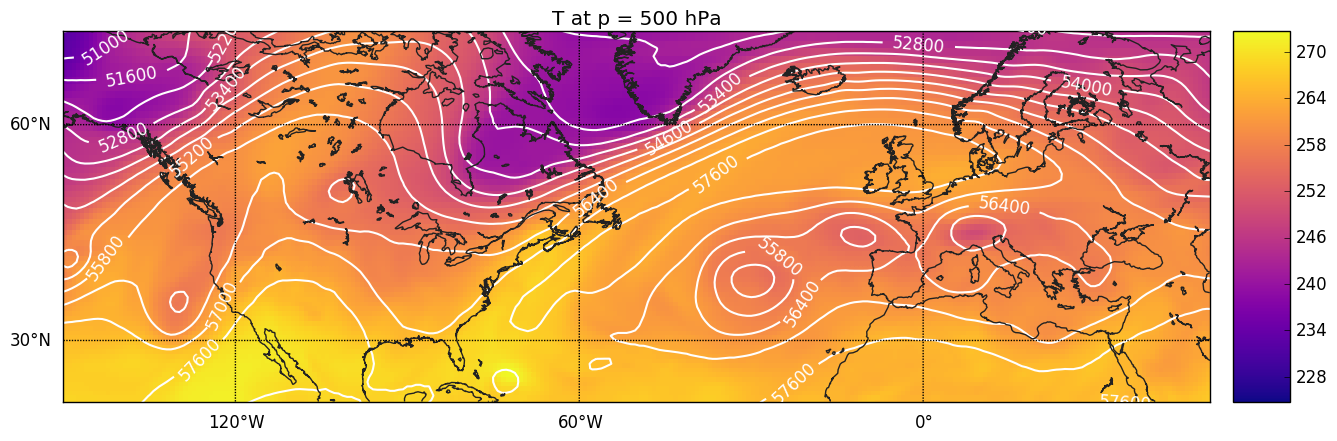

In [4]:
m.pcolormesh(lons, lats, T[n,:,:], cmap=pl.cm.plasma)
m.colorbar()
cz = m.contour(lons, lats, z[n,:,:], 15, colors='w', linewidths=1.5)
pl.clabel(cz, fmt='%1.0f')
m.drawcoastlines(color='#222222')
# draw parallels.
parallels = np.arange(0.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0])
# draw meridians
meridians = np.arange(0.,360.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1])
pl.title('T at p = {0:.0f} hPa'.format(p[n] / 100));
pl.tight_layout()

In [5]:
r_earth = 6.37e6

dzdx = np.zeros(z.shape)
dzdy = np.zeros(z.shape)

cos_lat = np.cos(latrad)
for k in range(p.size):
    dzdx[k,:,:] = 1./(r_earth*cos_lat) * \
                  np.gradient(z[k,:,:], axis=1) / np.gradient(lonrad, axis=1)

for k in range(p.size):
    dzdy[k,:,:] = (1./r_earth) * \
                  np.gradient(z[k,:,:], axis=0) / np.gradient(latrad, axis=0)

omega = 7.2921e-5
f = 2.*omega*np.sin(latrad)
ug = -1./f*dzdy
vg =  1./f*dzdx
Ug = (ug**2 + vg**2)**.5

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in multiply


NameError: name 'U' is not defined

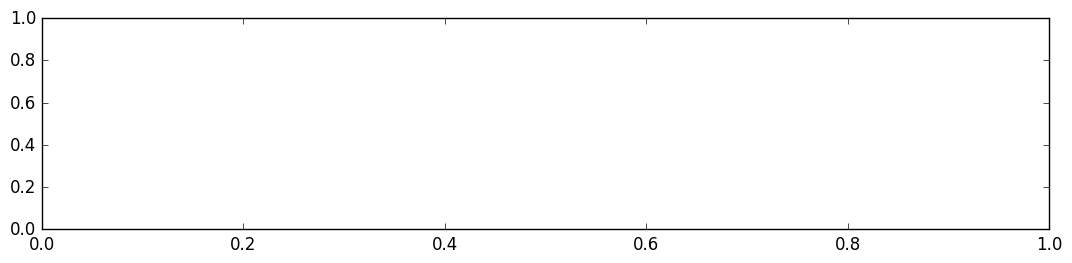

In [6]:
umin = 0.
umax = 60.
pl.subplot(211)
m.pcolormesh(lons, lats, U[n,:,:], vmin=umin, vmax=umax, cmap=pl.cm.gist_ncar)
m.colorbar()
m.contour(lons, lats, z[n,:,:], 15, colors='w', linewidths=1.5)
m.drawcoastlines()
# draw parallels.
parallels = np.arange(0.,90,20.)
m.drawparallels(parallels,labels=[1,0,0,0])
# draw meridians
meridians = np.arange(0.,360.,20.)
m.drawmeridians(meridians,labels=[0,0,0,1]);
pl.title('u (m/s)')
pl.subplot(212)
m.pcolormesh(lons, lats, Ug[n,:,:], vmin=umin, vmax=umax, cmap=pl.cm.gist_ncar)
m.colorbar();
m.contour(lons, lats, z[n,:,:], 15, colors='w', linewidths=1.5)
m.drawcoastlines()
# draw parallels.
parallels = np.arange(0.,90,20.)
m.drawparallels(parallels,labels=[1,0,0,0])
# draw meridians
meridians = np.arange(0.,360.,20.)
m.drawmeridians(meridians,labels=[0,0,0,1]);
pl.title('u_g (m/s)')
pl.tight_layout()

In [ ]:
dTdx = np.zeros(T.shape)
dTdy = np.zeros(T.shape)

cos_lat = np.cos(latrad)
for k in range(p.size):
    dTdx[k,:,:] = 1./(r_earth*cos_lat) * \
                  np.gradient(T[k,:,:], axis=1) / np.gradient(lonrad, axis=1)

for k in range(p.size):
    dTdy[k,:,:] = (1./r_earth) * \
                  np.gradient(T[k,:,:], axis=0) / np.gradient(latrad, axis=0)

In [ ]:
R = 287.
minmax=60.
pl.subplot(211)
m.pcolormesh(lons, lats, -R/f*dTdx[n,:,:], vmin=-minmax, vmax=minmax, cmap=pl.cm.seismic)
m.colorbar()
m.drawcoastlines()
# draw parallels.
parallels = np.arange(0.,90,20.)
m.drawparallels(parallels,labels=[1,0,0,0])
# draw meridians
meridians = np.arange(0.,360.,20.)
m.drawmeridians(meridians,labels=[0,0,0,1]);

pl.subplot(212)
m.pcolormesh(lons, lats,  R/f*dTdy[n,:,:], vmin=-minmax, vmax=minmax, cmap=pl.cm.seismic)
m.colorbar();
m.drawcoastlines()
# draw parallels.
parallels = np.arange(0.,90,20.)
m.drawparallels(parallels,labels=[1,0,0,0])
# draw meridians
meridians = np.arange(0.,360.,20.)
m.drawmeridians(meridians,labels=[0,0,0,1]);
pl.tight_layout()

In [ ]:
dvgdlnp = (vg[n+1]-vg[n-1])/(np.log(p[n+1])-np.log(p[n-1]))
dugdlnp = (ug[n+1]-ug[n-1])/(np.log(p[n+1])-np.log(p[n-1]))

pl.subplot(211)
m.pcolormesh(lons, lats, dvgdlnp, vmin=-minmax, vmax=minmax, cmap=pl.cm.seismic)
m.colorbar()
m.drawcoastlines()
# draw parallels.
parallels = np.arange(0.,90,20.)
m.drawparallels(parallels,labels=[1,0,0,0])
# draw meridians
meridians = np.arange(0.,360.,20.)
m.drawmeridians(meridians,labels=[0,0,0,1]);
pl.subplot(212)
m.pcolormesh(lons, lats, dugdlnp, vmin=-minmax, vmax=minmax, cmap=pl.cm.seismic)
m.colorbar()
m.drawcoastlines()
# draw parallels.
parallels = np.arange(0.,90,20.)
m.drawparallels(parallels,labels=[1,0,0,0])
# draw meridians
meridians = np.arange(0.,360.,20.)
m.drawmeridians(meridians,labels=[0,0,0,1]);
pl.tight_layout()

In [ ]:
m.pcolormesh(lons, lats, dvgdlnp+R/f*dTdx[n,:,:], vmin=-minmax, vmax=minmax, cmap=pl.cm.seismic)
m.colorbar();
m.drawcoastlines()
# draw parallels.
parallels = np.arange(0.,90,20.)
m.drawparallels(parallels,labels=[1,0,0,0])
# draw meridians
meridians = np.arange(0.,360.,20.)
m.drawmeridians(meridians,labels=[0,0,0,1]);
pl.tight_layout()

In [ ]:
minmax=20.
m.pcolormesh(lons, lats, U[n,:,:]-Ug[n,:,:], vmin=-minmax, vmax=minmax, cmap=pl.cm.RdBu)
m.colorbar();
m.contour(lons, lats, z[n,:,:], 12, colors='k')
m.drawcoastlines()
# draw parallels.
parallels = np.arange(0.,90,20.)
m.drawparallels(parallels,labels=[1,0,0,0])
# draw meridians
meridians = np.arange(0.,360.,20.)
m.drawmeridians(meridians,labels=[0,0,0,1]);
pl.title('ua = u - ug (m/s)')
pl.tight_layout()